In [1]:
import pandas as pd

In [2]:
store_df = pd.read_csv('store.csv')
df = pd.read_csv('train.csv')

/var/folders/r6/ltx5hdzx6lxg2rtm5cn9qqf80000gn/T/ipykernel_69190/305629052.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [3]:
merged_df = pd.merge(df, store_df, on='Store', how='left')

In [4]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [6]:
# Daten aus Date extrahieren (Jahr, Monat, Tag)
merged_df["Year"] = merged_df["Date"].str.slice(0, 4)
merged_df["Month"] = merged_df["Date"].str.slice(5, 7)
merged_df["Day"] = merged_df["Date"].str.slice(8, 10)
merged_df["Year"] = merged_df["Year"].astype("Int32")
merged_df["Month"] = merged_df["Month"].astype("Int32")
merged_df["Day"] = merged_df["Day"].astype("Int32")
merged_df.drop(columns=["Date"], inplace=True)

In [7]:
# Null Werte behandeln
merged_df["CompetitionDistance"].fillna(merged_df["CompetitionDistance"].mean(),inplace=True)
merged_df.fillna(-1, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Fehlschlag: Ohne die folgenden Zeilen schlägt das kodieren fehl, weil die Datentypen innerhalb einer oder mehrerer Spalten uneinheitlich sind
merged_df["StateHoliday"] = merged_df["StateHoliday"].astype(str)
merged_df["StoreType"] = merged_df["StoreType"].astype(str)
merged_df["Assortment"] = merged_df["Assortment"].astype(str)
merged_df["PromoInterval"] = merged_df["PromoInterval"].astype(str)


columns_to_encode = ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

label_encoder = LabelEncoder()

for column in columns_to_encode:   
    merged_df[column] = label_encoder.fit_transform(merged_df[column])
merged_df.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,-1.0,-1.0,0,2015,7,31
1,2,5,6064,625,1,1,0,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2,2015,7,31
2,3,5,8314,821,1,1,0,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2,2015,7,31
3,4,5,13995,1498,1,1,0,1,2,2,620.0,9.0,2009.0,0,-1.0,-1.0,0,2015,7,31
4,5,5,4822,559,1,1,0,1,0,0,29910.0,4.0,2015.0,0,-1.0,-1.0,0,2015,7,31


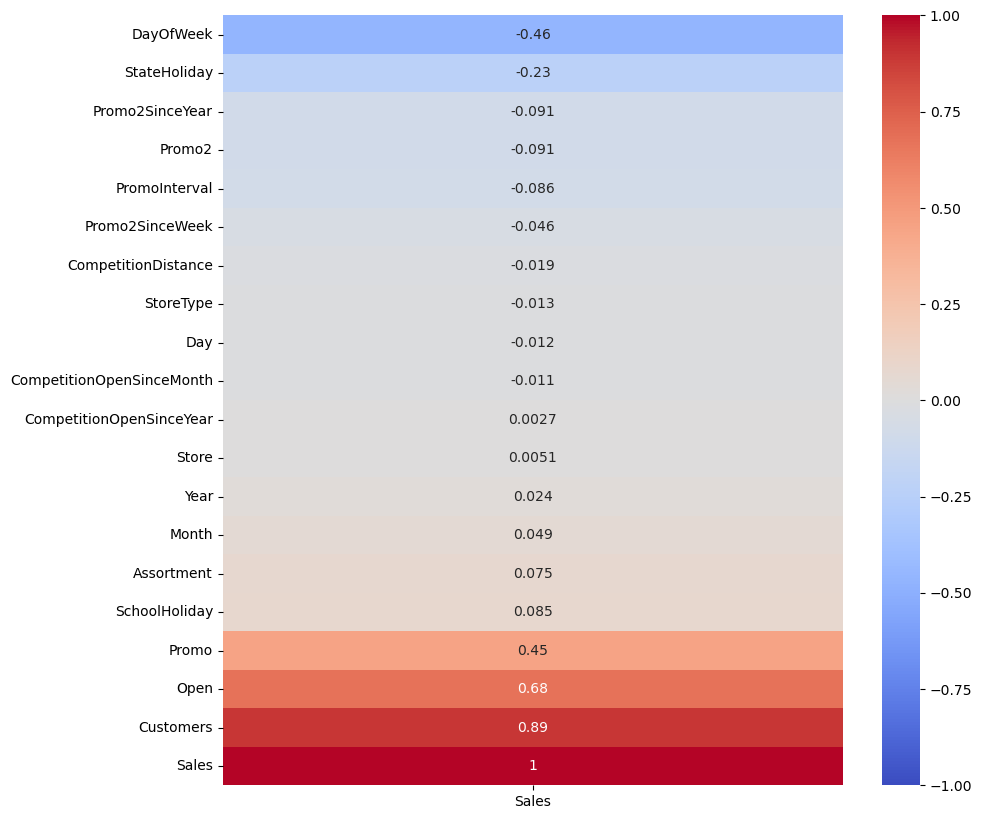

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(merged_df.corr()[['Sales']].sort_values('Sales'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

### CompetitionOpenSinceMonth und CompetitionOpenSinceYear hatten beide sehr viele fehlende Werte und scheinen eher irrelevant, weshalb wir sie rauswerfen

In [12]:
# merged_df.drop(columns=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"], inplace=True)
# merged_df_test.drop(columns=["CompetitionOpenSinceMonth","CompetitionOpenSinceYear"], inplace=True)

### Das auslassen der Spalten wurde später verworfen, weil die feature importance vom Random Forest darauf hindeutet, dass diese Features doch relevant sind

In [13]:
import pandas as pd

# Assuming 'merged_df' is your DataFrame containing columns 'year', 'month', and 'day'
# Concatenate year, month, and day columns into a single string in 'YYYY-MM-DD' format
date_strings = merged_df['Year'].astype(str) + '-' + merged_df['Month'].astype(str) + '-' + merged_df['Day'].astype(str)

# Convert date strings to datetime objects and assign to a new 'date' column
merged_df['Date'] = pd.to_datetime(date_strings, format='%Y-%m-%d')

# Now, 'date' column contains datetime objects representing the combined date

In [14]:
#change stateholiday 1 to public Holiday 2 to Easter and 3 to Christmas
merged_df["StateHoliday"] = merged_df["StateHoliday"].replace(1, "Public Holiday")
merged_df["StateHoliday"] = merged_df["StateHoliday"].replace(2, "Easter")
merged_df["StateHoliday"] = merged_df["StateHoliday"].replace(3, "Christmas")
merged_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Date
0,1,5,5263,555,1,1,0,1,2,0,1270.0,0,-1.0,-1.0,0,2015,7,31,2015-07-31
1,2,5,6064,625,1,1,0,1,0,0,570.0,1,13.0,2010.0,2,2015,7,31,2015-07-31
2,3,5,8314,821,1,1,0,1,0,0,14130.0,1,14.0,2011.0,2,2015,7,31,2015-07-31
3,4,5,13995,1498,1,1,0,1,2,2,620.0,0,-1.0,-1.0,0,2015,7,31,2015-07-31
4,5,5,4822,559,1,1,0,1,0,0,29910.0,0,-1.0,-1.0,0,2015,7,31,2015-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,Public Holiday,1,0,0,1900.0,1,31.0,2013.0,2,2013,1,1,2013-01-01
1017205,1112,2,0,0,0,0,Public Holiday,1,2,2,1880.0,0,-1.0,-1.0,0,2013,1,1,2013-01-01
1017206,1113,2,0,0,0,0,Public Holiday,1,0,2,9260.0,0,-1.0,-1.0,0,2013,1,1,2013-01-01
1017207,1114,2,0,0,0,0,Public Holiday,1,0,2,870.0,0,-1.0,-1.0,0,2013,1,1,2013-01-01


In [15]:
#show me how many stores are open on holidays
open_stores = merged_df[merged_df["Open"] == 1]
open_stores_holiday = open_stores.groupby("StateHoliday")["Store"].count()
open_stores_holiday

StateHoliday
0                 843482
Christmas             71
Easter               145
Public Holiday       694
Name: Store, dtype: int64

In [16]:
#show which store is open on Christmas
open_stores_christmas = open_stores[open_stores["StateHoliday"] == "Christmas"]
open_stores_christmas["Store"].unique()


array([  85,  259,  262,  274,  299,  335,  353,  423,  494,  530,  562,
        676,  682,  733,  769,  948, 1081, 1097, 1099,  512])

In [17]:
open_stores_easter = open_stores[open_stores["StateHoliday"] == "Easter"]
open_stores_christmas["Store"].unique()

array([  85,  259,  262,  274,  299,  335,  353,  423,  494,  530,  562,
        676,  682,  733,  769,  948, 1081, 1097, 1099,  512])

In [18]:
open_stores_PublicHoliday = open_stores[open_stores["StateHoliday"] == "Public Holiday"]
open_stores_christmas["Store"].unique()

array([  85,  259,  262,  274,  299,  335,  353,  423,  494,  530,  562,
        676,  682,  733,  769,  948, 1081, 1097, 1099,  512])

In [19]:
open_stores_allyear = open_stores[open_stores["StateHoliday"].isin(["Public Holiday", "Easter", "Christmas"])]


<Figure size 1000x600 with 0 Axes>

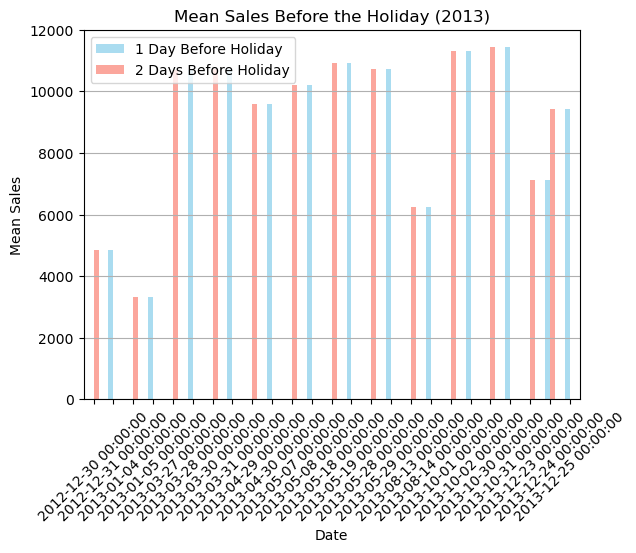

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the desired store IDs
desired_store_ids = [85, 259, 262, 274, 299, 335, 353, 423, 494, 530, 562,
                     676, 682, 733, 769, 948, 1081, 1097, 1099, 512]

# Filter data for the year 2013 from merged_df and only the desired store IDs
filtered_data = merged_df[(merged_df['Year'] == 2013) & (merged_df['Store'].isin(desired_store_ids))].copy()

# Convert Year, Month, and Day columns to datetime
filtered_data['Date'] = pd.to_datetime(filtered_data[['Year', 'Month', 'Day']])

# Filter data for public holidays, Easter, and Christmas
feiertage = ["Public Holiday", "Easter", "Christmas"]
holiday_data = filtered_data[filtered_data['StateHoliday'].isin(feiertage)].copy()

# Check for duplicate entries for the "Christmas" holiday
holiday_data = holiday_data[~((holiday_data['StateHoliday'] == 'Christmas') & (holiday_data['Date'].dt.day == 24))]

# Calculate day before and two days before the holiday
holiday_data['DayBeforeHoliday'] = holiday_data['Date'] - pd.Timedelta(days=1)
holiday_data['TwoDaysBeforeHoliday'] = holiday_data['Date'] - pd.Timedelta(days=2)

# Calculate mean sales for the day before and two days before the holiday
mean_sales_1day = holiday_data.groupby('DayBeforeHoliday')['Sales'].mean()
mean_sales_2days = holiday_data.groupby('TwoDaysBeforeHoliday')['Sales'].mean()

# Merge mean sales for both 1 day before and 2 days before the holiday
mean_sales = pd.concat([mean_sales_1day, mean_sales_2days], axis=1)
mean_sales.columns = ['1 Day Before Holiday', '2 Days Before Holiday']

# Plot mean sales for the day before and two days before the holiday
plt.figure(figsize=(10, 6))
mean_sales.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.title('Mean Sales Before the Holiday (2013)')
plt.xlabel('Date')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()
